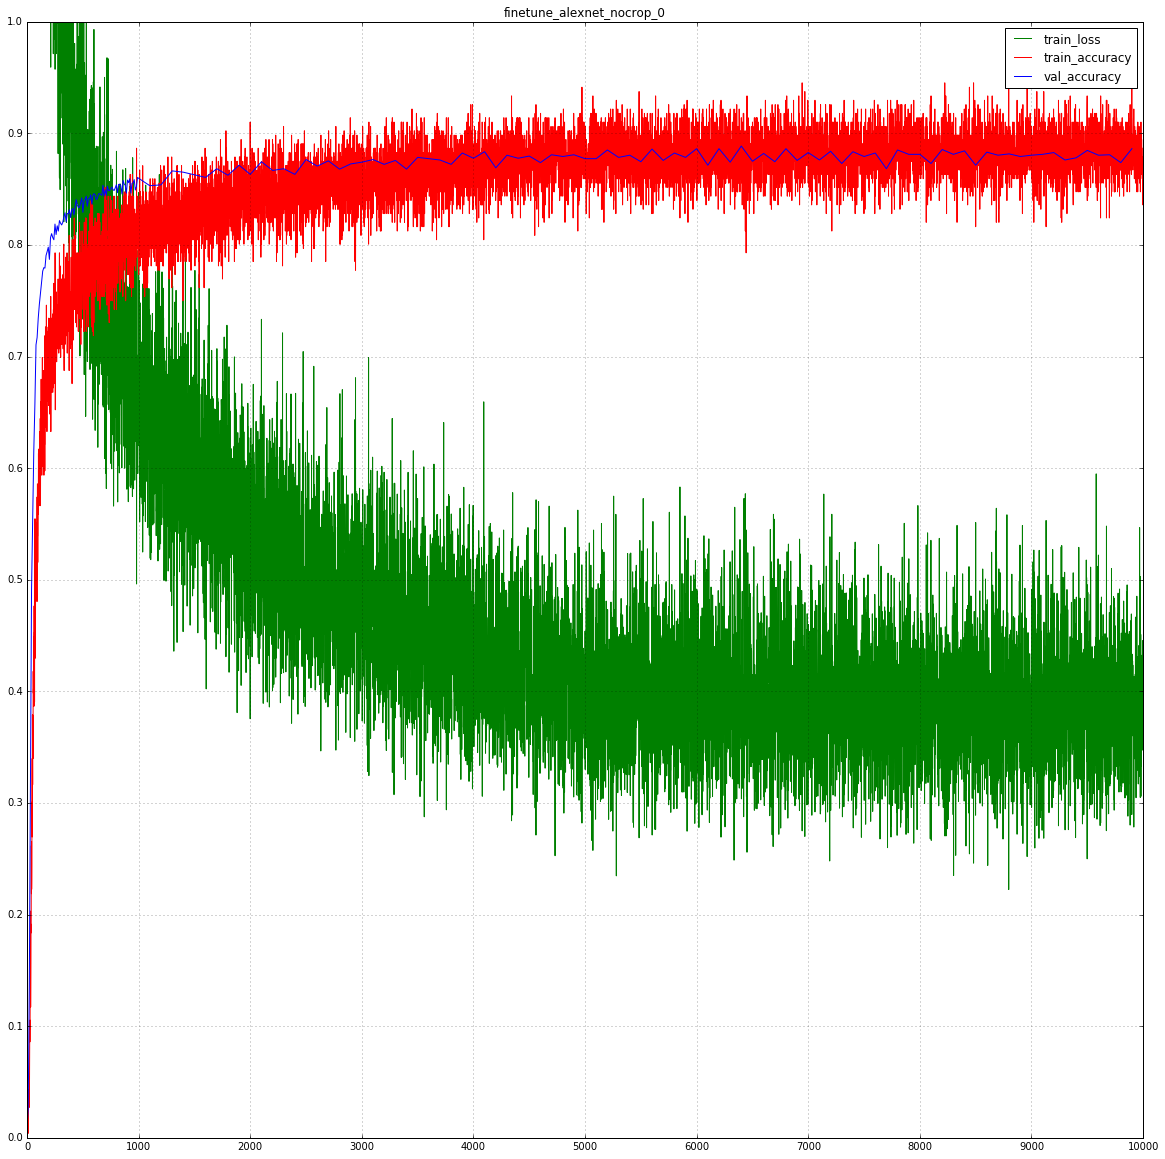

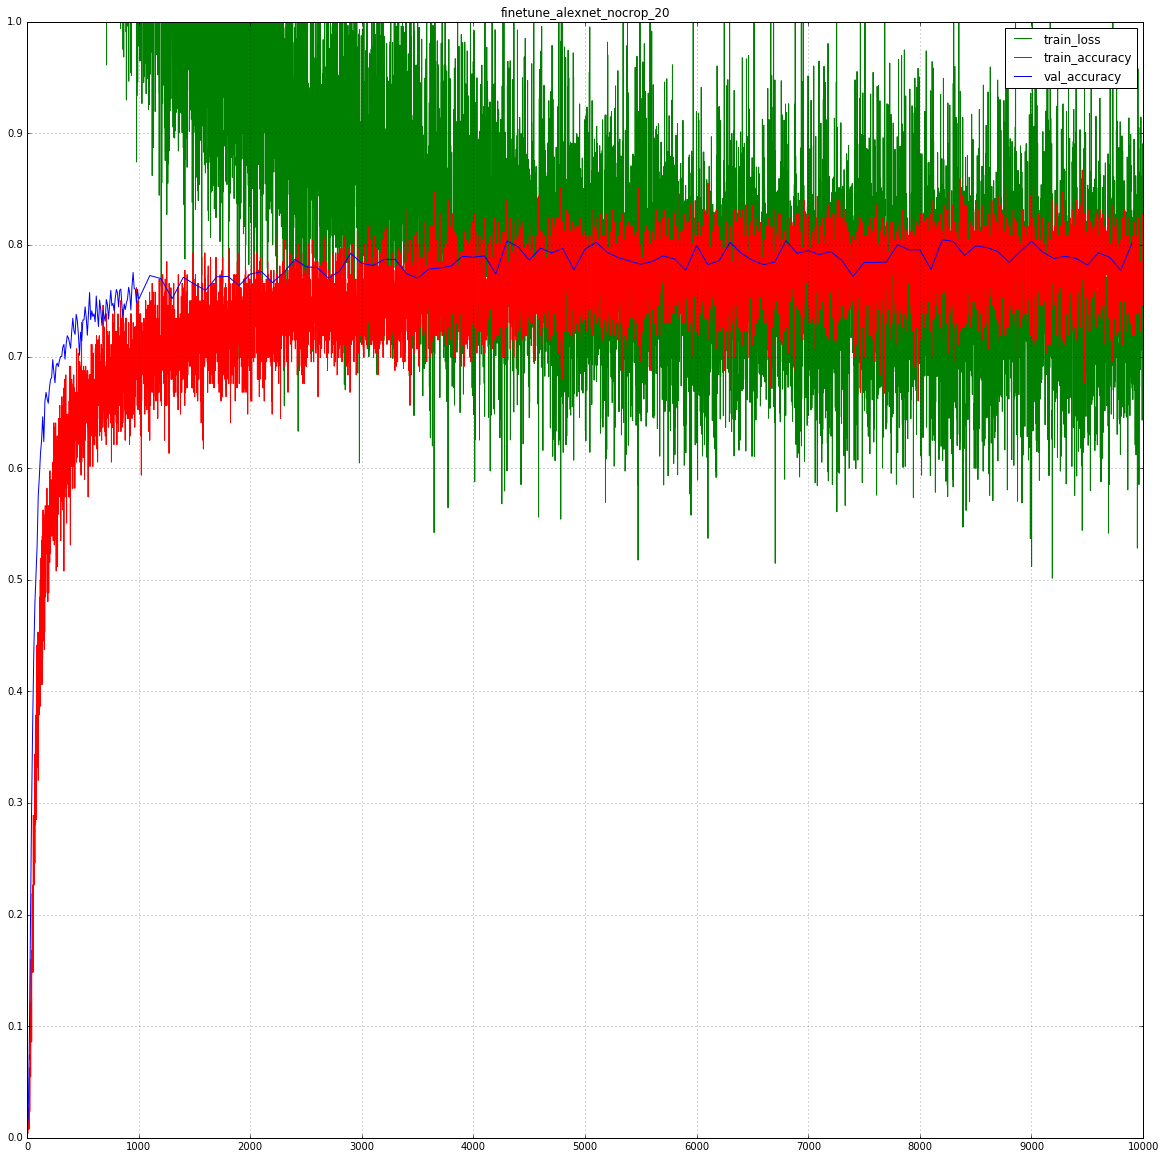

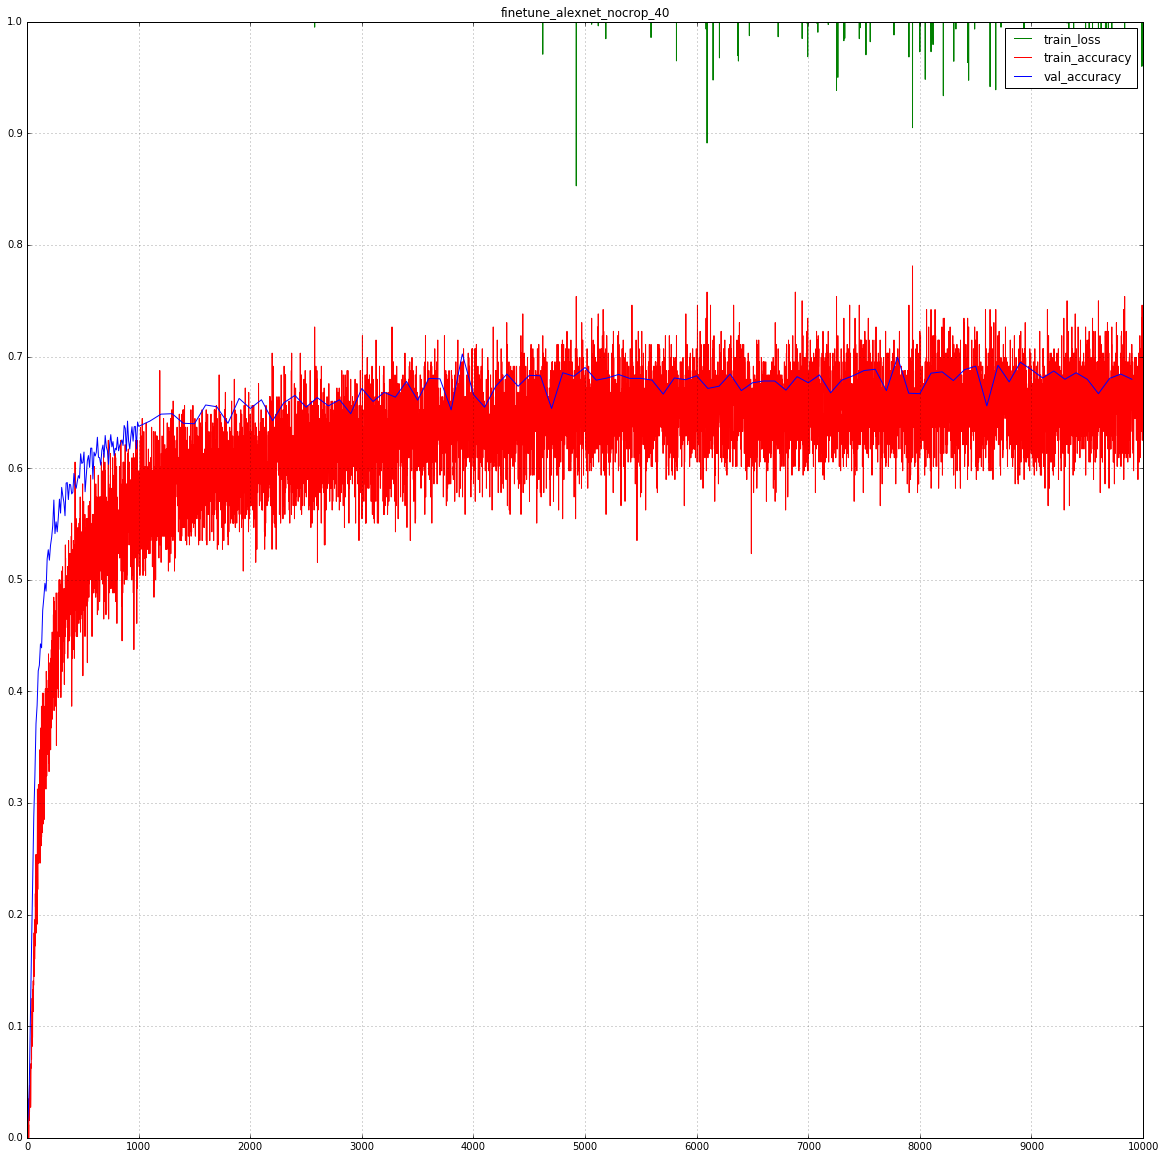

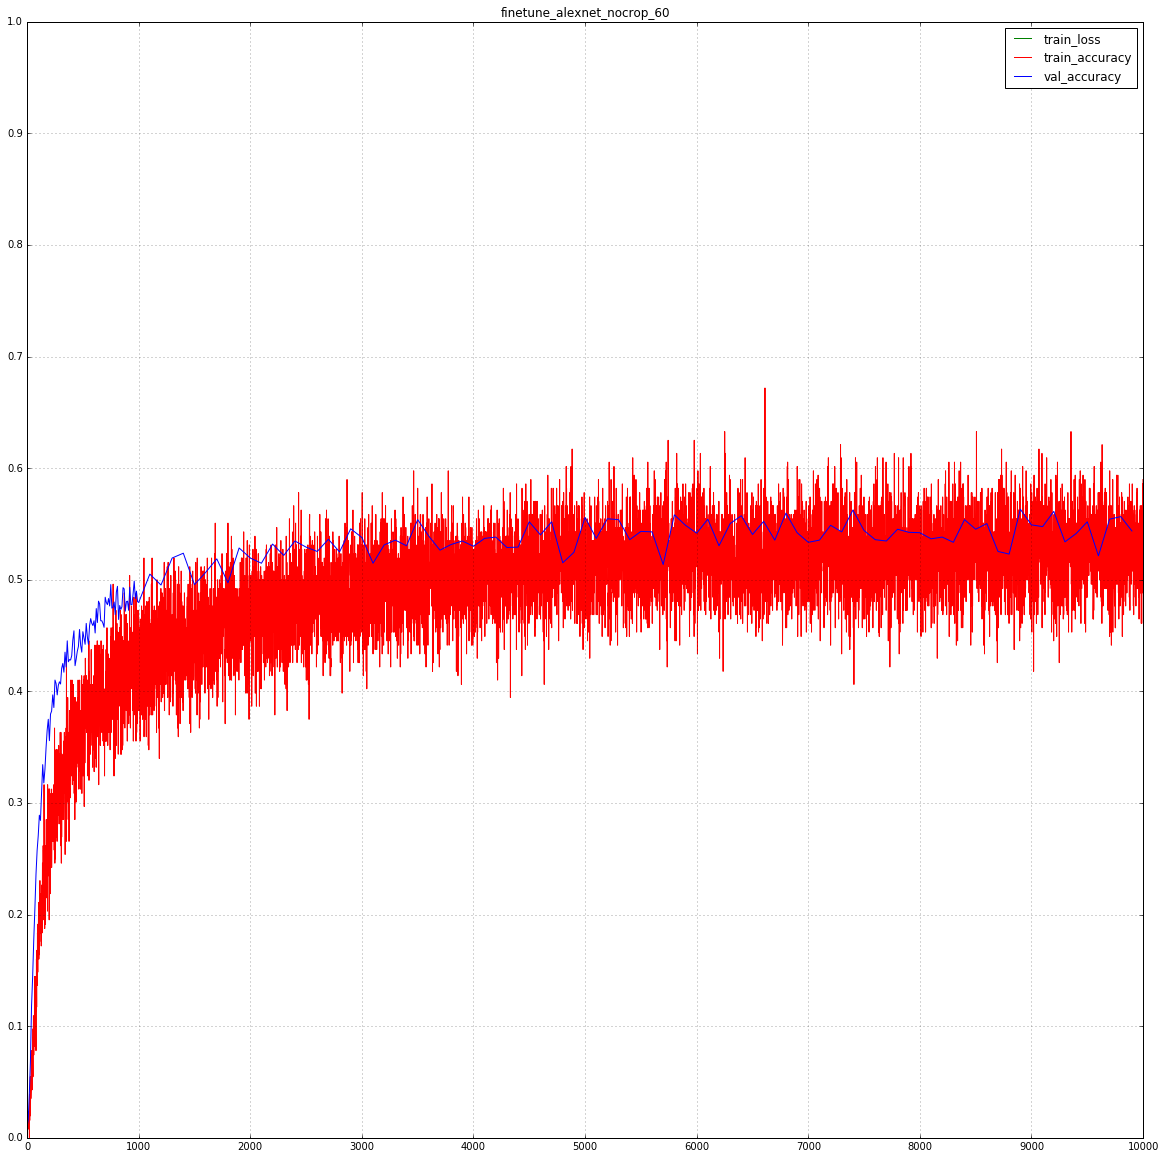

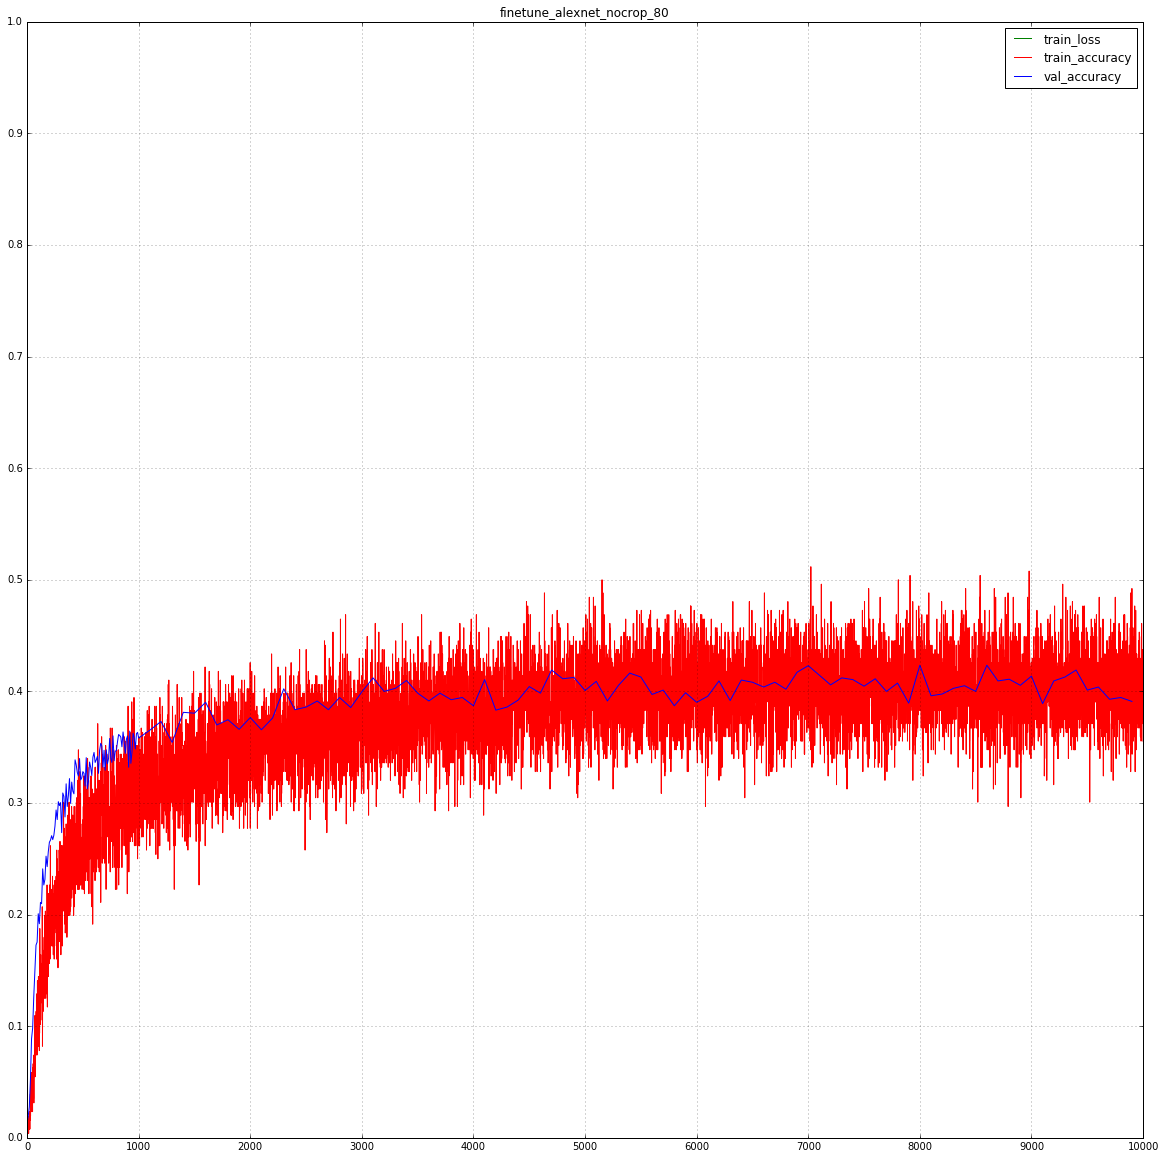

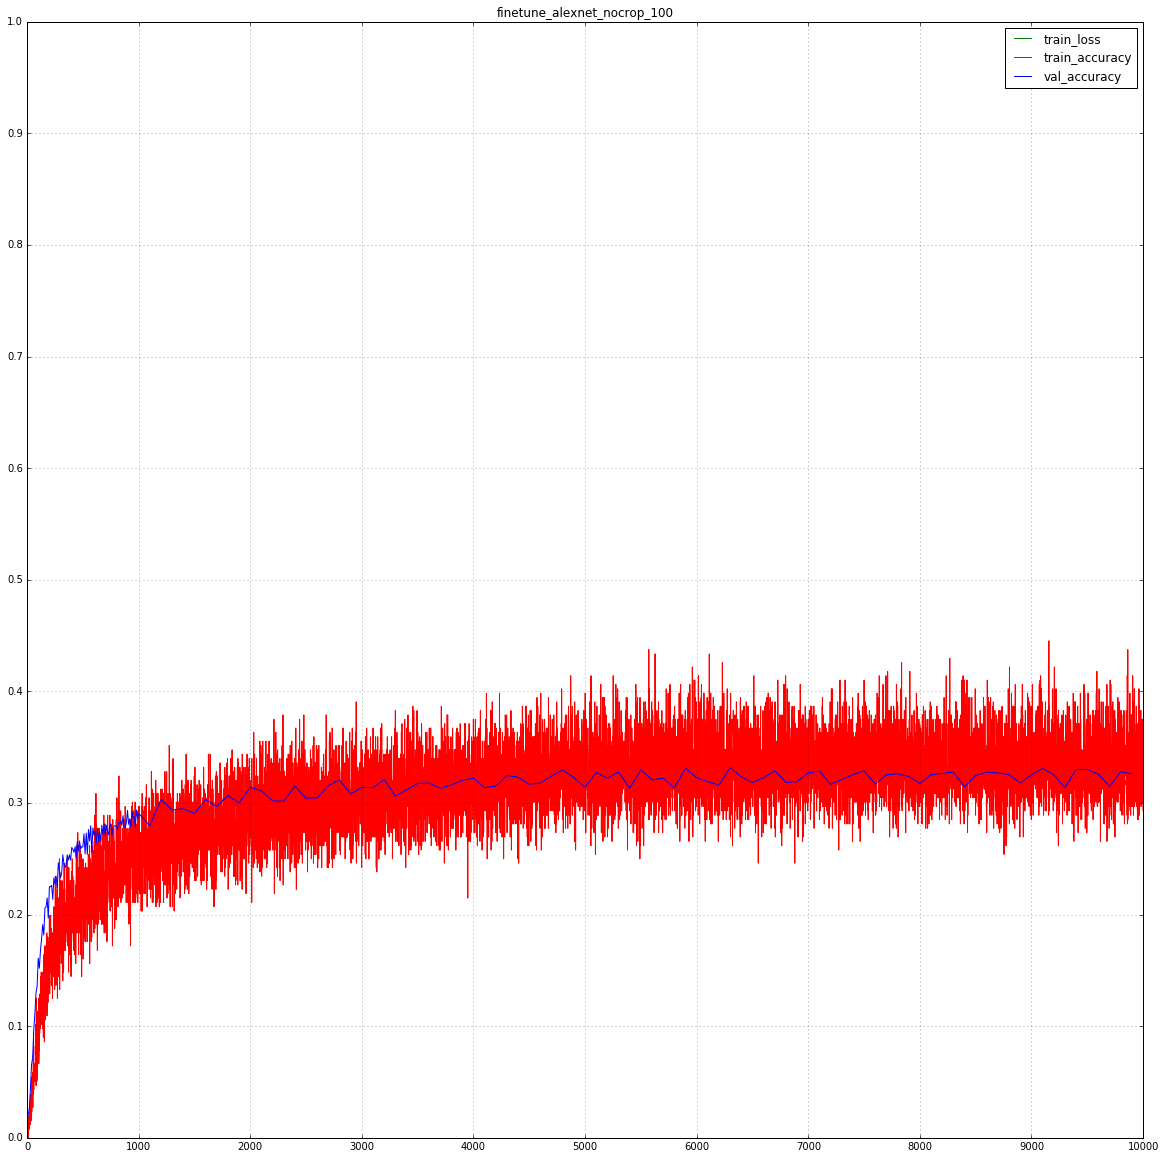

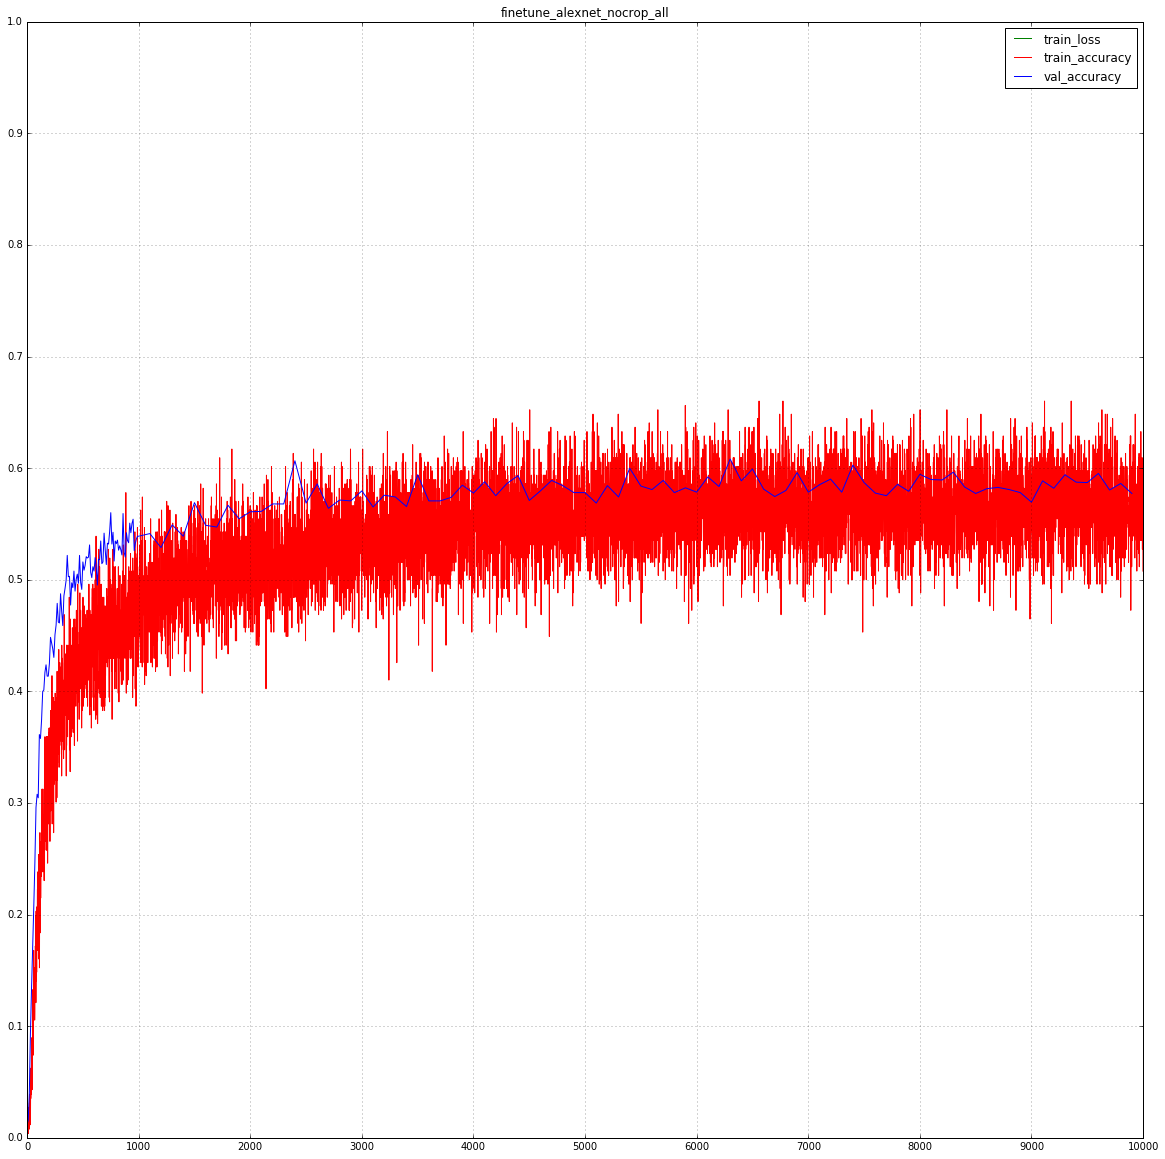

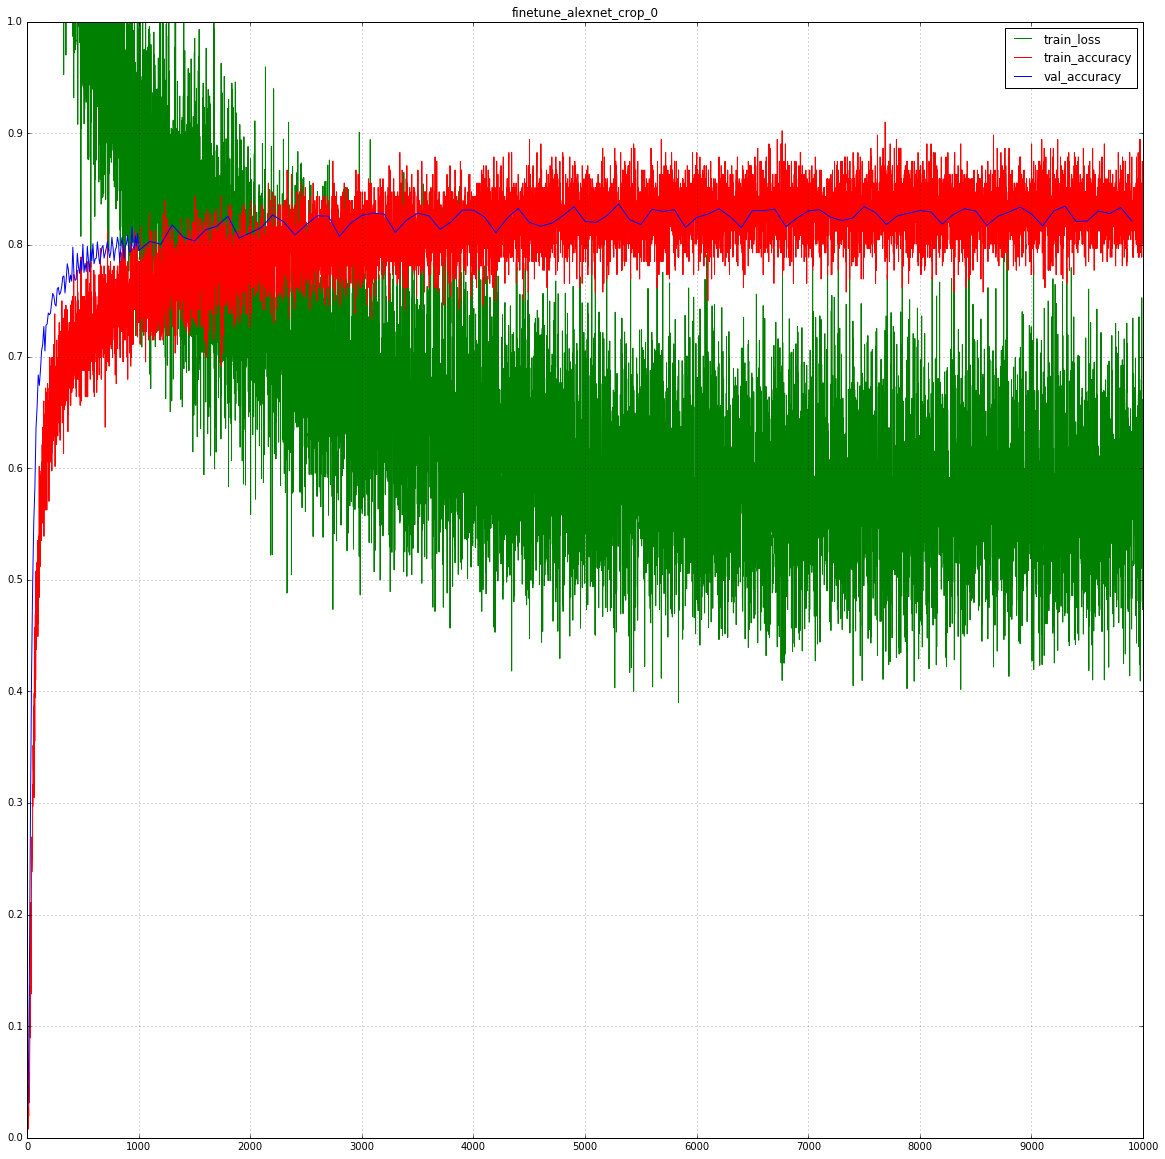

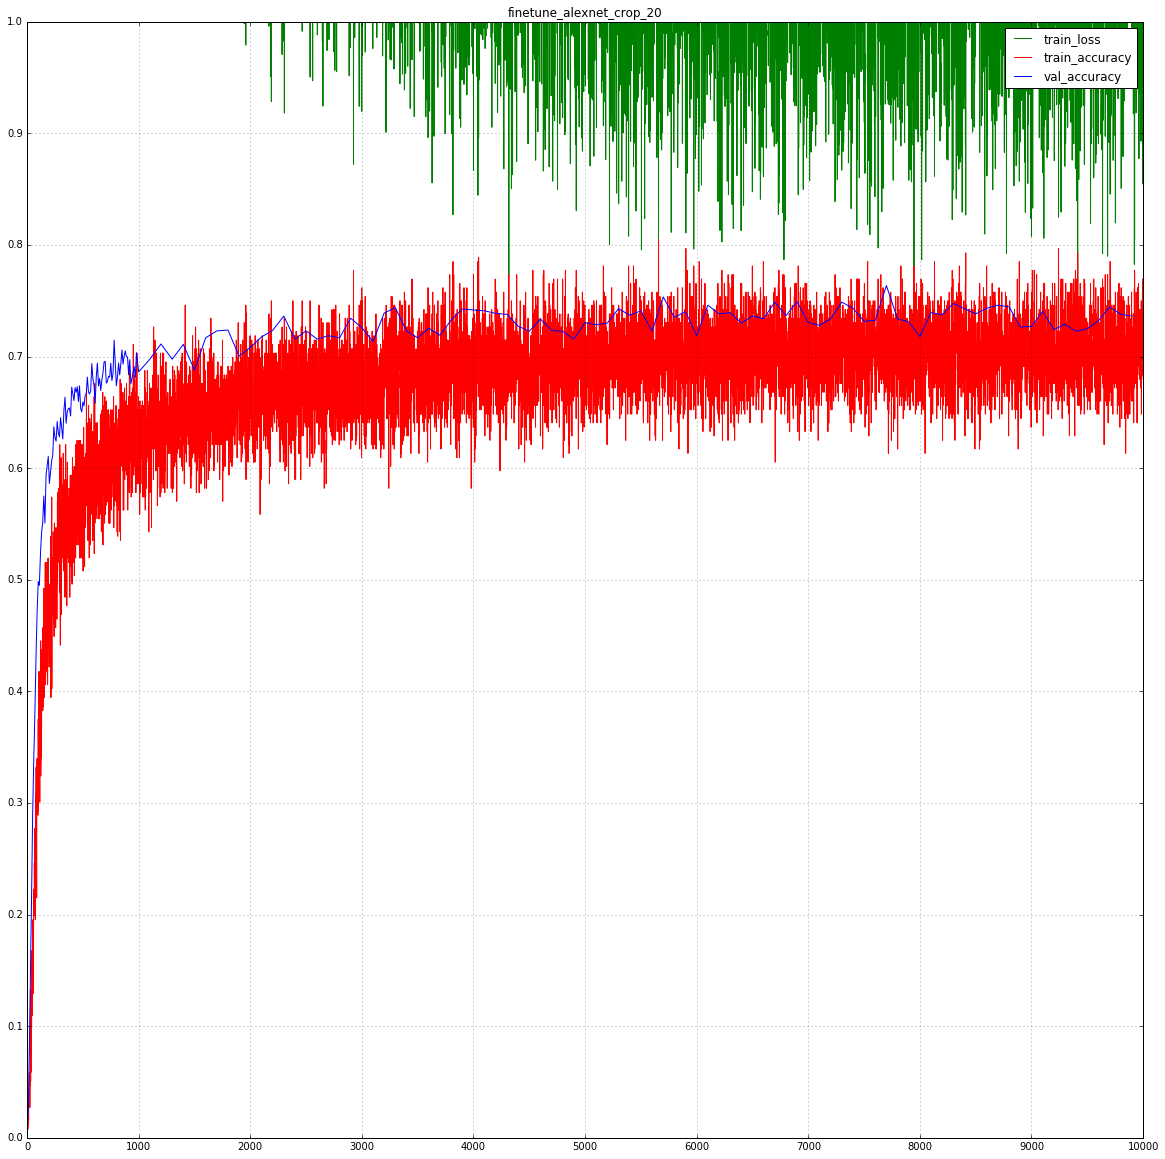

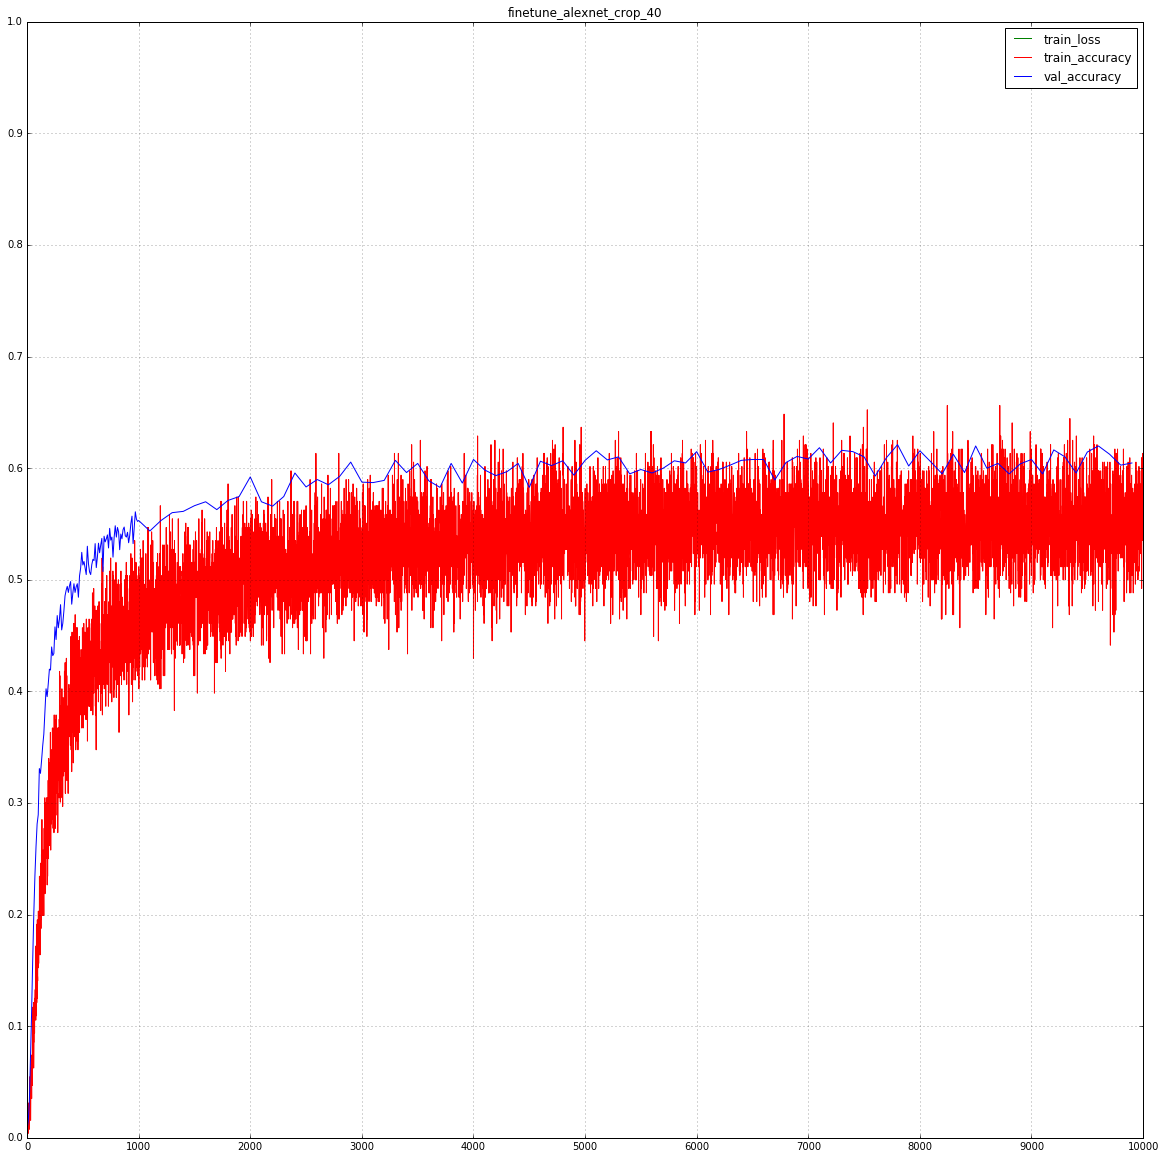

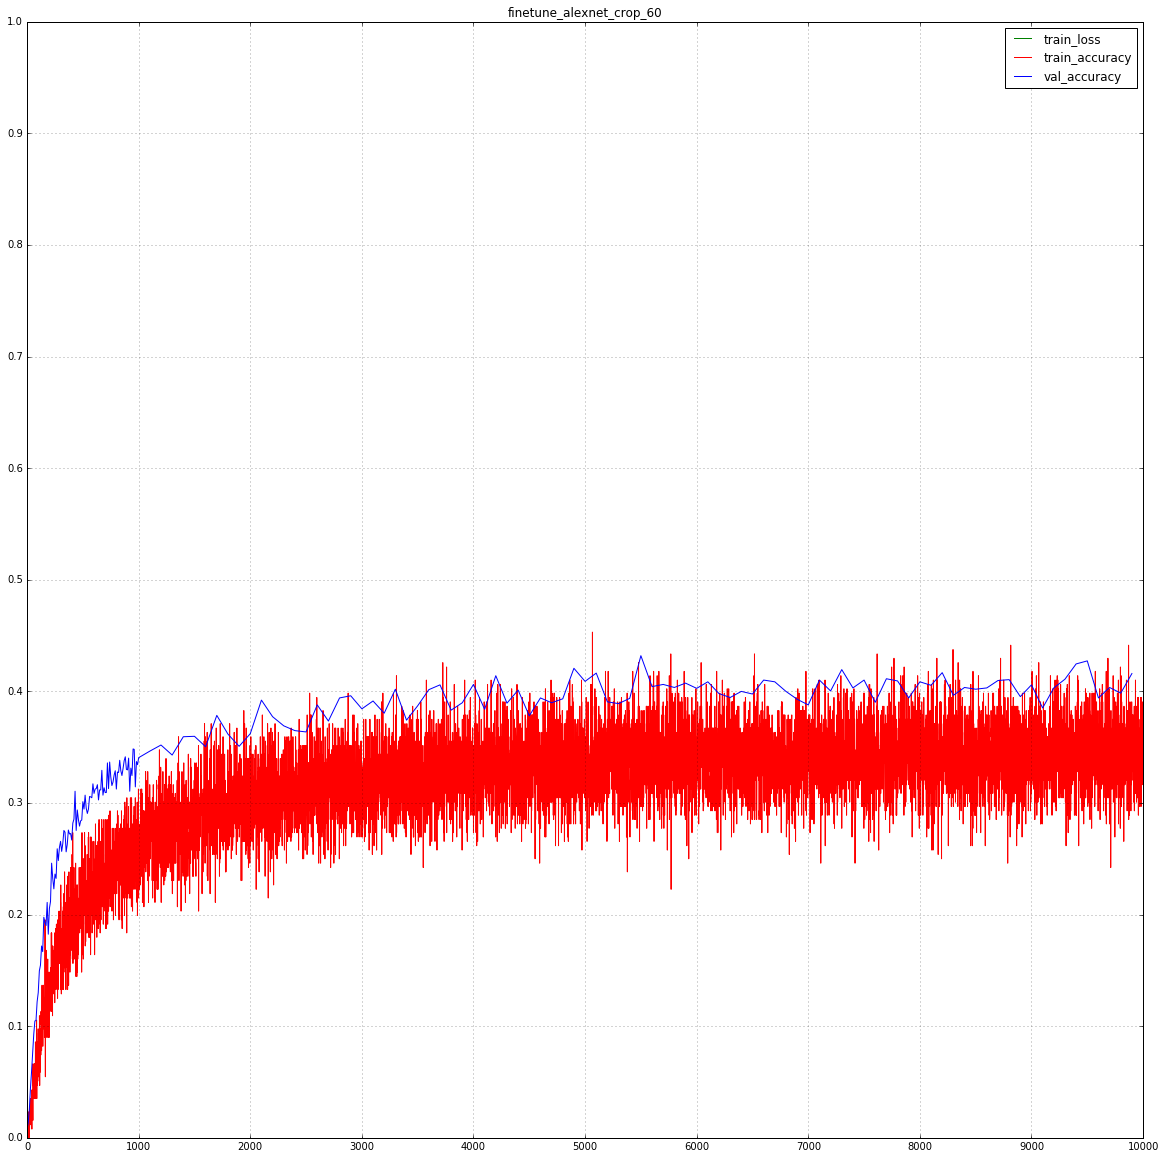

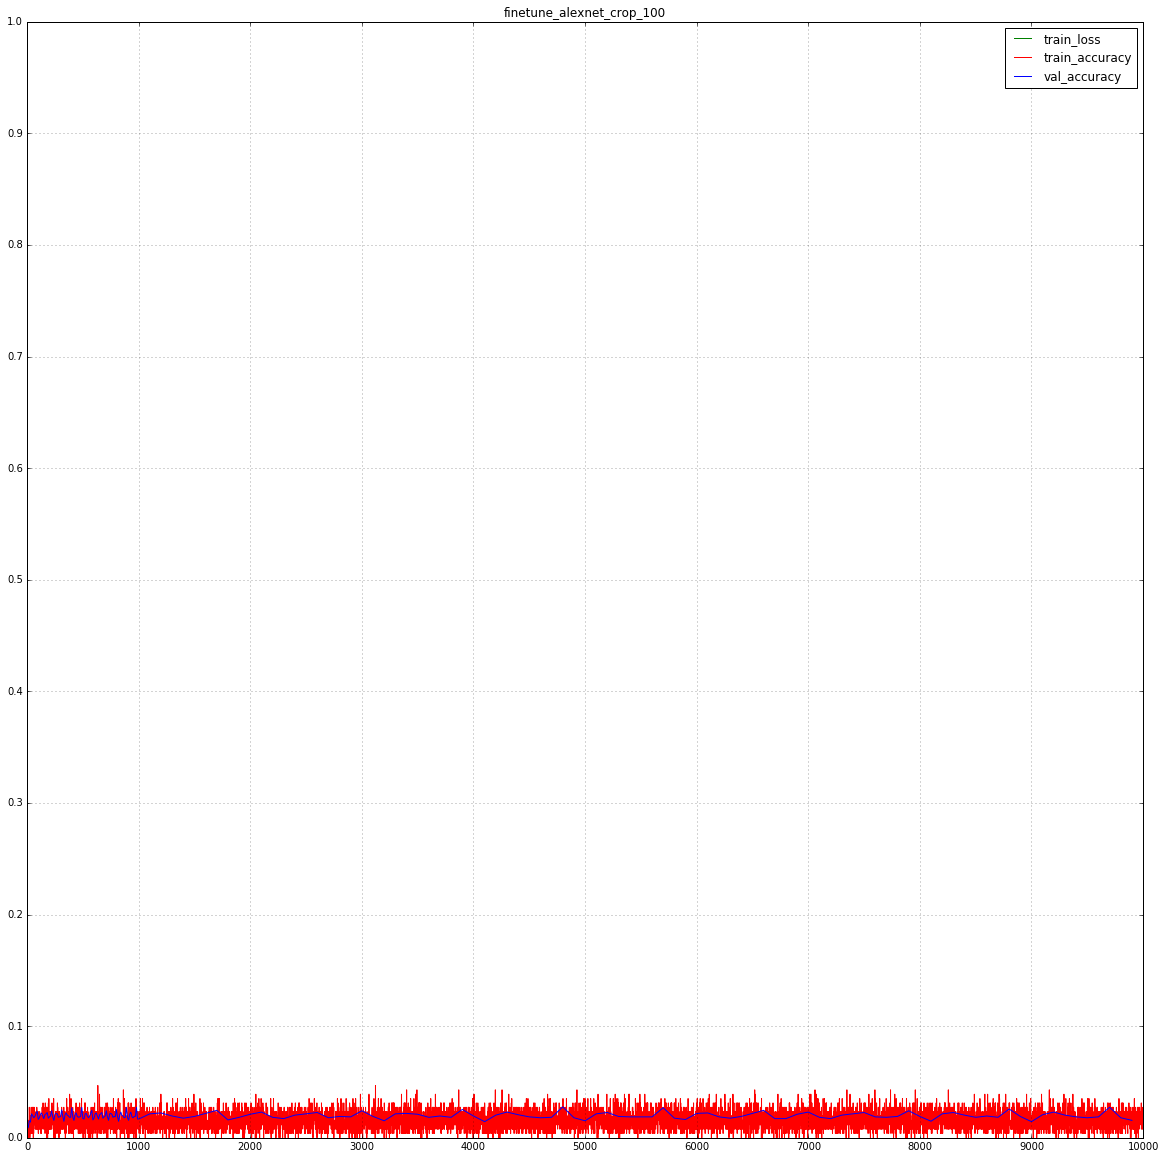

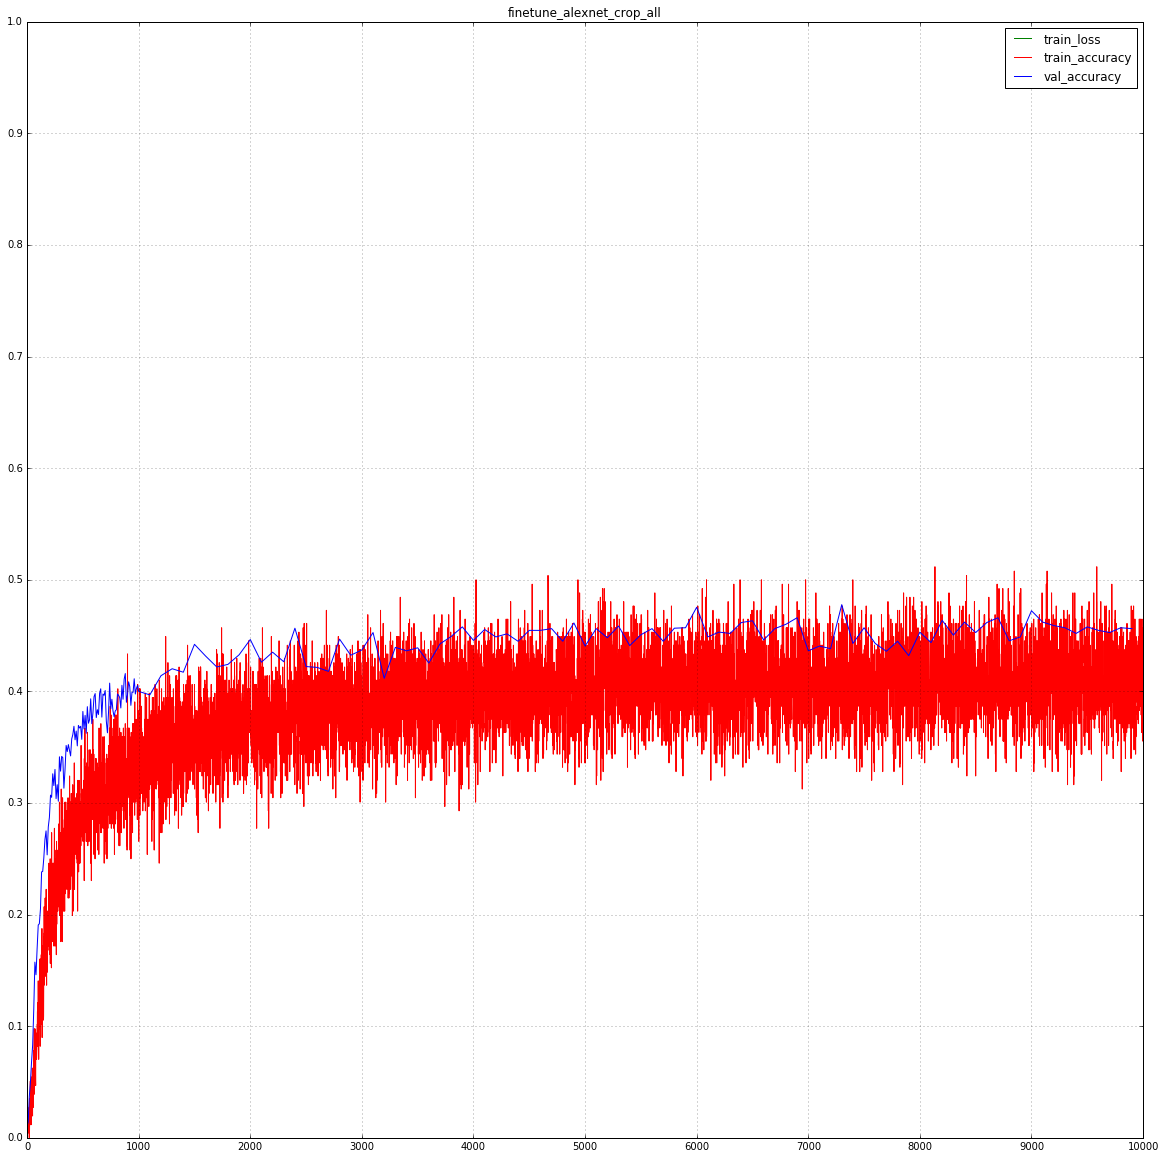

In [1]:
# Fine tuning visualization.
from constant import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle
%matplotlib inline

plt.rcParams['figure.figsize'] = (20, 20)

#net_names = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', 'all']
#type_strs = ['aperture']

#net_names = ['0', '25', '33', '50', '66', '80', '90', 'all']
#type_strs = ['crop', 'nocrop']

#net_names = ['0', '20', '40', '60', '80', '100', 'all']
#type_strs = ['crop_obj', 'nocrop_obj']

#net_names = ['0', '20', '40', '60', '80', '100', 'all']
#type_strs = ['1k_crop_obj', '1k_nocrop_obj']

#net_names = ['0', '60']
#type_strs = ['1k_crop_obj']

net_names = ['0', '20', '40', '60', '80', '100', 'all']
type_strs = ['nocrop', 'crop']

for type_str in type_strs:
    for net_name in net_names:
        fig = plt.figure()
        
        try:
            f = open('{}finetune/train_loss_{}_{}.pickle'.format(result_root, type_str, net_name))
        except IOError:
            print '{}_{} not found.'.format(type_str, net_name)
            continue
        train_loss = cPickle.load(f)
        f.close()
        
        try:
            f = open('{}finetune/train_accuracy_{}_{}.pickle'.format(result_root, type_str, net_name))
        except IOError:
            continue
        train_accuracy = cPickle.load(f)
        f.close()
        
        try:
            f = open('{}finetune/val_accuracy_{}_{}.pickle'.format(result_root, type_str, net_name))
        except IOError:
            continue 
        val_accuracy = cPickle.load(f)
        f.close()
        
        x_range = [0, 10000]
        x_unit = 1000
        y_range = [0, 1]
        y_unit = 0.1
        
        # Title.
        plt.title('finetune_alexnet_{}_{}'.format(type_str, net_name))

        # Curves.
        plt.plot(train_loss, zorder = 0, color = 'g')
        plt.plot(train_accuracy, zorder = 1, color = 'r')
        keys = sorted(val_accuracy.keys())
        values = [val_accuracy[key] for key in keys]
        plt.plot(keys, values, zorder = 2, color = 'b')
        plt.legend(['train_loss', 'train_accuracy', 'val_accuracy'], loc='upper right')

        # Grid.
        ax = plt.gca()
        ax.set_xlim(x_range)
        ax.set_ylim(y_range)
        ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit))                                                       
        ax.set_xticks(np.arange(x_range[0], x_range[1] + x_unit, x_unit), minor=True)                                           
        ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit))                                                       
        ax.set_yticks(np.arange(y_range[0], y_range[1] + y_unit, y_unit), minor=True)                                           
        ax.grid(which='both')                                                            
        ax.grid(which='minor', alpha=0.2)                                                
        ax.grid(which='major', alpha=0.5)     

        plt.show()
        fig.savefig('{}finetune/finetune_curve_{}_{}.png'.format(result_root, type_str, net_name))